# Albumentations

Ранее уже упоминалось, что для увеличения количества данных и улучшения обобщения модели часто используься техники  [аугментаций 📚[wiki] ](https://en.wikipedia.org/wiki/Data_augmentation). Однако, в случае работы с задачей сгементации, неободимо изменять одновременно и изображение, и его маску, для чего есть несколько библиотек:
* [[doc] 🛠️ Albumentations](https://albumentations.ai/docs/);
* [[doc] 🛠️ Kornia](https://kornia.readthedocs.io/en/latest/).

Далее рассмотрим пример использования библиотеки Albumentations.

## Особенности применения аугментаций при задаче сегментации

Вспомним, как работают аугментации. Они применяются "на лету" к исходным данным внутри класса датасета в методе `__getitem__()` перед тем, как пойти на вход в модель. В конструкторе класса датасета обычно список аугментаций указывается как атрибут `self.transform`.

Некоторые аугменации подразумевают вероятность ее применения $p$. В случае задачи классификации изображений, где нужно трансформируется только само входное изображение, а метка класса остается неизменной, никаких сложностей нет. Однако, в случае сегментации надо изменять одновременно и изображение, и его маску, с одной и той же веротностью и одинаковыми случайными парамерами самих аугментаций (угол поворота, сдвиг и т. п.).

В этом случае стандартные библиотеки, такие как [torchvision.transforms.v2 [doc] 🛠️ ](https://pytorch.org/vision/2.0/transforms.html) уже не подойдут. Поэтому для одновременного изменения изображений и их масок чаще всего используются реализации аугменаций из Albumentations.

## Пример использования Albumentations

Функция для отрисовки изображения и его маски

In [9]:
from matplotlib import pyplot as plt


def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
        ax[0].tick_params(
            left=False, right=False, labelleft=False, labelbottom=False, bottom=False
        )
        ax[1].tick_params(
            left=False, right=False, labelleft=False, labelbottom=False, bottom=False
        )
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title("Original image", fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title("Original mask", fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title("Transformed image", fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title("Transformed mask", fontsize=fontsize)

        ax[0, 0].tick_params(
            left=False, right=False, labelleft=False, labelbottom=False, bottom=False
        )
        ax[1, 0].tick_params(
            left=False, right=False, labelleft=False, labelbottom=False, bottom=False
        )
        ax[0, 1].tick_params(
            left=False, right=False, labelleft=False, labelbottom=False, bottom=False
        )
        ax[1, 1].tick_params(
            left=False, right=False, labelleft=False, labelbottom=False, bottom=False
        )

Загрузка изображения и его маски. В качестве примера возьмем фото со штрихкодом и его маской.

In [10]:
!wget -qN https://ml.gan4x4.ru/msu/dep-2.1/L11/barcode.jpg
!wget -qN https://ml.gan4x4.ru/msu/dep-2.1/L11/barcode_mask.png

In [11]:
import cv2

image = cv2.imread("barcode.jpg")
mask = cv2.imread("barcode_mask.png", cv2.IMREAD_GRAYSCALE)

Посмотрим на их размерность:

In [12]:
print(image.shape, mask.shape)

(1536, 2048, 3) (1536, 2048)


Визуализиуем данные:

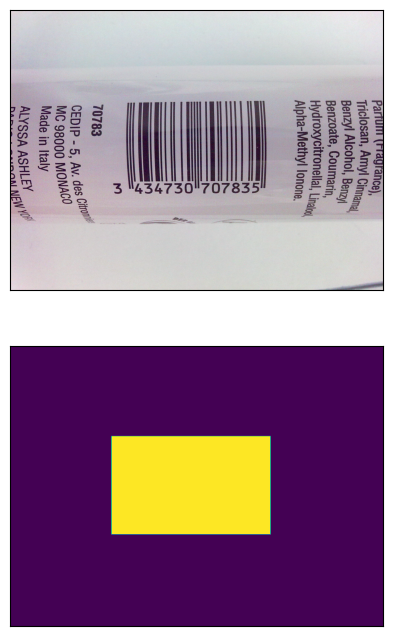

In [13]:
visualize(image, mask)

Теперь зададим аугментацию поворота из albumentations и визуализируем результат ее применения:

In [14]:
!pip install -qU albumentations

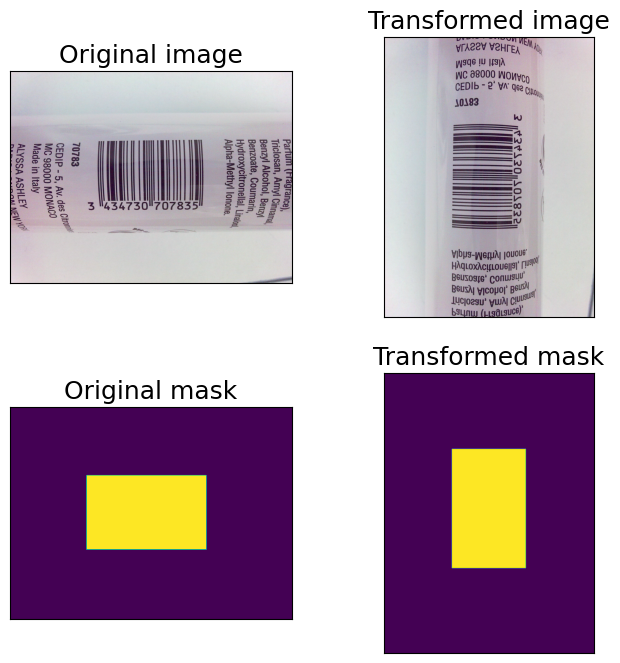

In [15]:
import albumentations as A

transform = A.Transpose(p=1)

transformed = transform(image=image, mask=mask)
transformed_image = transformed["image"]
transformed_mask = transformed["mask"]

visualize(transformed_image, transformed_mask, original_image=image, original_mask=mask)

Видим, что одни и те же изменения произошли как и для изображения, так и для его маски. Попробуем применить другую аугментацию из этой же библиотеки:

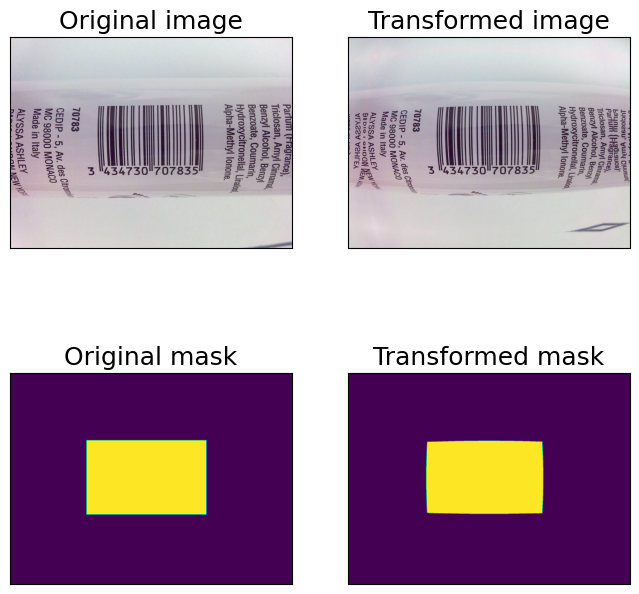

In [16]:
import random

transform = A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)

random.seed(42)
transformed = transform(image=image, mask=mask)
transformed_image = transformed["image"]
transformed_mask = transformed["mask"]

visualize(transformed_image, transformed_mask, original_image=image, original_mask=mask)

Принцип обращения с трансформациями в библиотеке Albumentations отлично поясняет следующая схема:

<center><img src ="https://ml.gan4x4.ru/msu/dep-2.1/L11/inria_image_and_mask.jpg" width="800"></center>

<center><em>Source: <a href="https://albumentations.ai/docs/getting_started/mask_augmentation/"> Mask augmentation for segmentation.</a></em></center>